In [1]:
import pandas as pd       
import numpy as np

In [2]:
train_ds = pd.read_csv( "kaggle\labeledTrainData.tsv", delimiter="\t", quoting=3 )

In [3]:
train_ds.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [4]:
train_ds.shape

(25000, 3)

In [5]:
print( train_ds["review"][8] )

"A friend of mine bought this film for £1, and even then it was grossly overpriced. Despite featuring big names such as Adam Sandler, Billy Bob Thornton and the incredibly talented Burt Young, this film was about as funny as taking a chisel and hammering it straight through your earhole. It uses tired, bottom of the barrel comedic techniques - consistently breaking the fourth wall as Sandler talks to the audience, and seemingly pointless montages of 'hot girls'.<br /><br />Adam Sandler plays a waiter on a cruise ship who wants to make it as a successful comedian in order to become successful with women. When the ship's resident comedian - the shamelessly named 'Dickie' due to his unfathomable success with the opposite gender - is presumed lost at sea, Sandler's character Shecker gets his big break. Dickie is not dead, he's rather locked in the bathroom, presumably sea sick.<br /><br />Perhaps from his mouth he just vomited the worst film of all time."


In [6]:
from bs4 import BeautifulSoup

In [7]:
print( BeautifulSoup( train_ds["review"][8] ).get_text() )

"A friend of mine bought this film for £1, and even then it was grossly overpriced. Despite featuring big names such as Adam Sandler, Billy Bob Thornton and the incredibly talented Burt Young, this film was about as funny as taking a chisel and hammering it straight through your earhole. It uses tired, bottom of the barrel comedic techniques - consistently breaking the fourth wall as Sandler talks to the audience, and seemingly pointless montages of 'hot girls'.Adam Sandler plays a waiter on a cruise ship who wants to make it as a successful comedian in order to become successful with women. When the ship's resident comedian - the shamelessly named 'Dickie' due to his unfathomable success with the opposite gender - is presumed lost at sea, Sandler's character Shecker gets his big break. Dickie is not dead, he's rather locked in the bathroom, presumably sea sick.Perhaps from his mouth he just vomited the worst film of all time."


In [8]:
train_ds["review_new"] = train_ds.review.map( lambda comment: BeautifulSoup( comment ).get_text() ) 

In [9]:
train_ds.head()

,id,sentiment,review,review_new
0,"""5814_8""",1,"""With all this stuff going down at the moment ...","""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...","""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...","""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi...","""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...","""Superbly trashy and wondrously unpretentious ..."


In [10]:
print( train_ds["review_new"][8] )

"A friend of mine bought this film for £1, and even then it was grossly overpriced. Despite featuring big names such as Adam Sandler, Billy Bob Thornton and the incredibly talented Burt Young, this film was about as funny as taking a chisel and hammering it straight through your earhole. It uses tired, bottom of the barrel comedic techniques - consistently breaking the fourth wall as Sandler talks to the audience, and seemingly pointless montages of 'hot girls'.Adam Sandler plays a waiter on a cruise ship who wants to make it as a successful comedian in order to become successful with women. When the ship's resident comedian - the shamelessly named 'Dickie' due to his unfathomable success with the opposite gender - is presumed lost at sea, Sandler's character Shecker gets his big break. Dickie is not dead, he's rather locked in the bathroom, presumably sea sick.Perhaps from his mouth he just vomited the worst film of all time."


In [11]:
import re
train_ds["review_new"] = train_ds.review_new.map( lambda comment: re.sub("[^a-zA-Z]", " ", comment ) ) 

In [12]:
print( train_ds["review_new"][8] )

 A friend of mine bought this film for     and even then it was grossly overpriced  Despite featuring big names such as Adam Sandler  Billy Bob Thornton and the incredibly talented Burt Young  this film was about as funny as taking a chisel and hammering it straight through your earhole  It uses tired  bottom of the barrel comedic techniques   consistently breaking the fourth wall as Sandler talks to the audience  and seemingly pointless montages of  hot girls  Adam Sandler plays a waiter on a cruise ship who wants to make it as a successful comedian in order to become successful with women  When the ship s resident comedian   the shamelessly named  Dickie  due to his unfathomable success with the opposite gender   is presumed lost at sea  Sandler s character Shecker gets his big break  Dickie is not dead  he s rather locked in the bathroom  presumably sea sick Perhaps from his mouth he just vomited the worst film of all time  


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
count_vectorizer = CountVectorizer( max_features = 5000 ) 

In [16]:
feature_vector = count_vectorizer.fit( train_ds.review_new )
train_ds_features = count_vectorizer.transform( train_ds.review_new )

In [18]:
train_ds_features.shape

(25000, 5000)

In [19]:
features = feature_vector.get_feature_names()

In [20]:
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )

In [21]:
features_counts

array([187, 125, 108, ..., 740, 518, 147], dtype=int64)

In [22]:
feature_counts = pd.DataFrame( dict( features = features, counts = features_counts ) )

In [23]:
feature_counts.head()

,counts,features
0,187,abandoned
1,125,abc
2,108,abilities
3,454,ability
4,1259,able


In [24]:
feature_counts.sort( "counts", ascending = False )

,counts,features
4430,336645,the
166,164103,and
3068,145853,of
4508,135698,to
2325,107315,is
2332,96444,it
2221,93958,in
4456,75966,this
4428,73275,that
4809,48194,was


In [26]:
count_vectorizer = CountVectorizer( stop_words = "english", max_features = 5000 ) 
feature_vector = count_vectorizer.fit( train_ds.review_new )
train_ds_features = count_vectorizer.transform( train_ds.review_new )

In [27]:
features = feature_vector.get_feature_names()
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features, counts = features_counts ) )
feature_counts.sort( "counts", ascending = False )

,counts,features
2918,44030,movie
1688,40146,film
2578,20274,like
2408,17766,just
1908,15140,good
4516,12723,time
4240,11983,story
3561,11736,really
318,9301,bad
3204,9285,people


In [45]:
from sklearn.naive_bayes import GaussianNB 

In [32]:
clf = GaussianNB()

In [35]:
clf.fit( train_ds_features.toarray(), train_ds.sentiment )

GaussianNB()

In [36]:
train_ds["sentiment_predict"] = clf.predict( train_ds_features.toarray() )

In [37]:
from sklearn import metrics

In [38]:
cm = metrics.confusion_matrix( train_ds.sentiment, train_ds.sentiment_predict )

In [40]:
cm

array([[11310,  1190],
       [ 4774,  7726]])

In [41]:
import matplotlib as plt
import seaborn as sn
%matplotlib inline

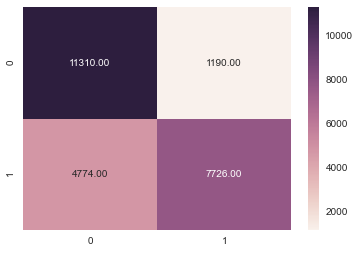

In [42]:
sn.heatmap(cm, annot=True,  fmt='.2f' );

In [43]:
score = metrics.accuracy_score( train_ds.sentiment, train_ds.sentiment_predict )

In [44]:
score

0.76144000000000001

In [46]:
from sklearn.cross_validation import cross_val_score

In [47]:
scores = cross_val_score( clf, train_ds_features.toarray(), train_ds.sentiment, cv = 10, scoring = "accuracy")

In [50]:
scores.mean()

NameError: name 'scores' is not defined

In [57]:
test_ds = pd.read_csv( "kaggle\labeledTrainData.tsv", delimiter="\t", quoting=3 )

In [58]:
test_ds.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [59]:
test_ds["review_new"] = test_ds.review.map( lambda comment: re.sub("[^a-zA-Z]", " ", BeautifulSoup( comment ).get_text() ) ) 

In [60]:
test_ds_features = count_vectorizer.transform( test_ds.review_new )

In [62]:
test_ds["sentiment"] = clf.predict( test_ds_features.toarray() )

In [63]:
test_ds.head()

,id,sentiment,review,review_new
0,"""5814_8""",0,"""With all this stuff going down at the moment ...",With all this stuff going down at the moment ...
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",The Classic War of the Worlds by Timothy ...
2,"""7759_3""",1,"""The film starts with a manager (Nicholas Bell...",The film starts with a manager Nicholas Bell...
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",It must be assumed that those who praised thi...
4,"""9495_8""",0,"""Superbly trashy and wondrously unpretentious ...",Superbly trashy and wondrously unpretentious ...


In [65]:
test_ds.review_new[1]

'   The Classic War of the Worlds   by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H  G  Wells  classic book  Mr  Hines succeeds in doing so  I  and those who watched his film with me  appreciated the fact that it was not the standard  predictable Hollywood fare that comes out every year  e g  the Spielberg version with Tom Cruise that had only the slightest resemblance to the book  Obviously  everyone looks for different things in a movie  Those who envision themselves as amateur   critics   look only to criticize everything they can  Others rate a movie on more important bases like being entertained  which is why most people never agree with the   critics    We enjoyed the effort Mr  Hines put into being faithful to H G  Wells  classic novel  and we found it to be very entertaining  This made it easy to overlook what the   critics   perceive to be its shortcomings  '

In [68]:
test_ds.review_new[4]

' Superbly trashy and wondrously unpretentious    s exploitation  hooray  The pre credits opening sequences somewhat give the false impression that we re dealing with a serious and harrowing drama  but you need not fear because barely ten minutes later we re up until our necks in nonsensical chainsaw battles  rough fist fights  lurid dialogs and gratuitous nudity  Bo and Ingrid are two orphaned siblings with an unusually close and even slightly perverted relationship  Can you imagine playfully ripping off the towel that covers your sister s naked body and then stare at her unshaven genitals for several whole minutes  Well  Bo does that to his sister and  judging by her dubbed laughter  she doesn t mind at all  Sick  dude  Anyway  as kids they fled from Russia with their parents  but nasty soldiers brutally slaughtered mommy and daddy  A friendly smuggler took custody over them  however  and even raised and trained Bo and Ingrid into expert smugglers  When the actual plot lifts off     